In [1]:
# base package
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
# translation package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# 设置字体
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [4]:
dataPath = '../../../data/machineLearning/household_power_consumption_1000.txt'
data = pd.read_csv(dataPath, sep = ';')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1000.0,2.418772,1.239979,0.206,1.806,2.414,3.308,7.706
Global_reactive_power,1000.0,0.089232,0.088088,0.000,0.000,0.072,0.126,0.528
Voltage,1000.0,240.035790,4.084420,230.980,236.940,240.650,243.295,249.370
Global_intensity,1000.0,10.351000,5.122214,0.800,8.400,10.000,14.000,33.200
Sub_metering_1,1000.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
Sub_metering_2,1000.0,2.749000,8.104053,0.000,0.000,0.000,1.000,38.000
Sub_metering_3,1000.0,5.756000,8.066941,0.000,0.000,0.000,17.000,19.000


In [5]:
#非法字符替换为np.nan
new_df = data.replace('?',np.nan)
#去掉有缺失值的行
data = new_df.dropna(axis=0, how='any')

In [6]:
# 视在功率＝根号下（有功功率的平方＋无功功率的平方），有功功率＝视在功率×功率因数 。
# active_power:有功功率
# reactive_power:无功功率
# 特征介绍
# date: 日期格式为 dd/mm/yy
# time: 时间格式为 hh:mm:ss
# Global_active_power: 全球消耗的总有功功率（千瓦），在交流电路中，电源在一个周期内发出瞬时功率的平均值(或负载电阻所消耗的功率)，称为"有功功率"
# Global_reactive_power: 全球消耗的总无功功率（千瓦），在具有电感或电容的电路中，在每半个周期内，把电源能量变成磁场(或电场)能量贮存起来，然后，再释放，又把贮存的磁场（或电场）能量再返回给电源，只是进行这种能量的交换，并没有真正消耗能量，我们把这个交换的功率值，称为" 无功功率"
# voltage: 平均电压（伏特）
# Global_intensity: 平均电流强度（安培)
# sub_metering_1: 厨房的有功功率
# sub_metering_2: 用于洗衣机等电器的有功功率
# sub_metering_3: 空调热水器等电器的有功功率
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 78.1+ KB


In [7]:
# 电流
X = data['Global_intensity'].values.reshape(-1,1)
# 电压
Y = data['Global_active_power'].values.reshape(-1,1)

In [8]:
# train_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签。
# 格式：
# X_train,X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.3, random_state=0)
# 参数解释：
# train_data：被划分的样本特征集
# train_target：被划分的样本标签
# test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
# random_state：是随机数的种子。
# 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
# 随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：
# 种子不同,产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_train.shape

(800, 1)

In [9]:
# 训练数据标准化
ss = StandardScaler()
#先拟合设定范围，再转换测试集
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
#有截距
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, Y_train)
y_predict = lr.predict(X_test)
#R2，训练集
lr.score(X_train,Y_train)
lr.score(X_test,Y_test)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# MSE：误差平方和，越趋近于0表示模型越拟合训练数据。
# RMSE：MSE的平方根，作用同MSE
# R2：取值范围(负无穷,1]，值越大表示模型越拟合训练数据；最优解是1；当模型预测为随机值的时候，有可能为负；若预测值恒为样本期望，R2为0
# TSS：总平方和TSS(Total Sum of Squares)，表示样本之间的差异情况，是伪方差的m倍
# RSS：残差平方和RSS（Residual Sum of Squares），表示预测值和样本值之间的差异情况，是MSE的m倍

#MSE
mse = np.average((y_predict - Y_test)**2)
rmse = np.sqrt(mse)
print(mse, rmse)

0.013812255178050705 0.11752555117101432


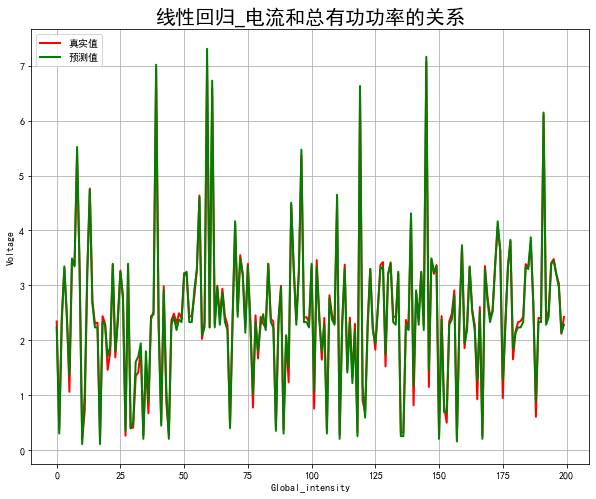

In [12]:
#时间轴，作为横坐标
t = np.arange(len(X_test))

#绘制
plt.figure(facecolor='w', figsize=(10,8))  #指定画布背景色为白色
plt.plot(t,Y_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label='预测值')

plt.ylabel("Voltage")
plt.xlabel("Global_intensity")
plt.legend(loc='upper left')

plt.title('线性回归_电流和总有功功率的关系',fontsize=20)
plt.grid(True)
plt.show()

In [14]:
# 固化
from sklearn.externals import joblib

#保存模型
#保存回归模型
joblib.dump(lr,'./data_lr.model')
joblib.dump(ss,'./data_ss.model')
# 加载
ss3 = joblib.load('./data_ss.model')
lr3 = joblib.load('./data_lr.model')

In [22]:
# 系数
print(lr3.coef_)
# 截距
print(lr3.intercept_)
print(ss3)

[[1.21822539]]
[2.4064425]
StandardScaler(copy=True, with_mean=True, with_std=True)
